## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [4]:
df.user_id.nunique()

290584

d. The proportion of users converted.

In [5]:
df.converted.mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
len(df[(df.group=='treatment') & (df.landing_page!='new_page')]) + len(df[(df.group!='treatment')
                                                                          & (df.landing_page=='new_page')])

3893

f. Do any of the rows have missing values?

In [7]:
df.isnull().sum() 

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [8]:
df2 = df[((df.group=='treatment') & (df.landing_page=='new_page')) | 
           ((df.group=='control') & (df.landing_page=='old_page'))]

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [10]:
df2.user_id.nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [11]:
df2[df2.user_id.duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [12]:
df2[df2.user_id.duplicated()]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290585 non-null  int64 
 1   timestamp     290585 non-null  object
 2   group         290585 non-null  object
 3   landing_page  290585 non-null  object
 4   converted     290585 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 10.0+ MB


In [14]:
df2 = df2.drop_duplicates(subset='user_id')

In [15]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290584 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       290584 non-null  int64 
 1   timestamp     290584 non-null  object
 2   group         290584 non-null  object
 3   landing_page  290584 non-null  object
 4   converted     290584 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 10.0+ MB


`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [16]:
df2.converted.mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [17]:
df2[df2.group=='control'].converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [18]:
df2[df2.group=='treatment'].converted.mean()

0.11880806551510564

d. What is the probability that an individual received the new page?

In [19]:
len(df2[df2.landing_page=='new_page']) / len(df2.landing_page)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

<b>
    from our total population (290584 users), the percentage of converted users in the control group is 12.04 %, while the percentage of those who converted in the treatment group is 11.88 %, meaning that the old design is better than the new one. However, more testing is needed to check the statistical signifigance of these results.
    <b>


<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

Null Hypothesis: the conversion rate of the old page is higher than or equal to that of the new page.
Alternative Hypothesis: the conversion rate of the new page is higher than that of the old page.

**$H_{0}$**:      **$p_{old}$** >=  **$p_{new}$**

**$H_{1}$**:     **$p_{old}$**  <   **$p_{new}$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [20]:
p_new = df2.converted.mean()
p_new

0.11959708724499628

b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = df2.converted.mean()
p_old

0.11959708724499628

c. What is $n_{new}$?

In [22]:
n_new = len(df2[df2.landing_page=='new_page'])
n_new

145310

d. What is $n_{old}$?

In [23]:
n_old = len(df2[df2.landing_page=='old_page'])
n_old

145274

e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [24]:
new_page_converted = np.random.choice(2, size=n_new, p=[p_new, (1-p_new)])
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [25]:
old_page_converted =  np.random.choice(2, size=n_old, p=[p_old, (1-p_old)])
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [26]:
new_page_converted.mean() - old_page_converted.mean()

0.0019224417758959556

h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [27]:
p_diffs=[]

for _ in range(10000):
    new_sim = np.random.choice(2, size=n_new, p=[p_new, (1-p_new)])
    old_sim = np.random.choice(2, size=n_old, p=[p_old, (1-p_old)])
    diff = new_sim.mean() - old_sim.mean()
    p_diffs.append(diff)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

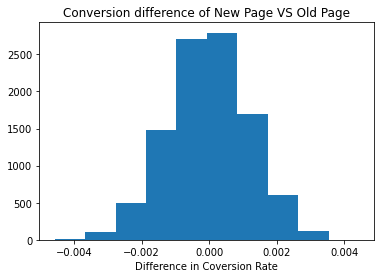

In [28]:
p_diffs = np.array(p_diffs)
plt.hist(p_diffs)
plt.title('Conversion difference of New Page VS Old Page')
plt.xlabel('Difference in Coversion Rate')

plt.show()

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [29]:
actual_diff = df2[df2.group=='treatment'].converted.mean() - df2[df2.group=='control'].converted.mean()
actual_diff

-0.0015782389853555567

In [30]:
# the propotion of the p_diffs that are greater than the actual difference
(p_diffs > actual_diff).mean()

0.9072

**we can see that 90% of the p_diffs is greater than the actual difference observed in ab_data.csv**

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**After simulating the sampling distribtion of the means of the converted proportion of new and old page, we computed the difference between the observed and actual proportions which is scientifically called `pvalue`. Since pvalue(0.9) is higher than the confidence level (α = 0.05), then we fail to reject the null hypothesis. We don't have statistically significant evidence to assume that the new page design has higher conversion rate than the old page.**

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [31]:
import statsmodels.api as sm

convert_old = len(df2[(df2.group=='control') & (df2.converted==1)])
convert_new = len(df2[(df2.group=='treatment') & (df2.converted==1)])
n_old = len(df2[df2.group=='control'])
n_new = len(df2[df2.group=='treatment'])
convert_old, convert_new, n_old, n_new

(17489, 17264, 145274, 145310)

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [32]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new], alternative='smaller')
z_score, p_value

(1.3109241984234394, 0.9050583127590245)

In [33]:
from scipy.stats import norm
# define probability
p = 0.95
z_critical = norm.ppf(p)
z_critical

1.6448536269514722

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

**We computed test statistic of 1.31 while z critical is 1.64, since test statisitic < z_critical so we fail to reject the null hypothesis.
this agrees with the p-value approach, since our pvalue (0.91) is higher than the chosen confidence level of 0.05 so we fail to reject the null hypothesis. However the difference in pvalue originates from our hypothetical assumption in parts j. and k. that p_new and p_old are the same.**

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**we will use `Logistic Regression` since our target variable is categorical**

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [34]:
df2['intercept'] = 1
df2 = pd.get_dummies(data= df2, columns=['group'], drop_first=True)
df2.head()

,user_id,timestamp,landing_page,converted,intercept,group_treatment
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,old_page,1,1,0


In [35]:
df2.rename(columns={'group_treatment': 'ab_page'}, inplace=True)
df2.head()

,user_id,timestamp,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [36]:
X = df2[['intercept', 'ab_page']]
y = df2[['converted']]

In [37]:
# building the model and fitting the data 
log_reg = sm.Logit(y, X).fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [38]:
print(log_reg.summary()) 

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Fri, 12 Feb 2021   Pseudo R-squ.:               8.077e-06
Time:                        13:36:35   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007


e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

<b>
p-value associated with logistic regression is 0.189 which is different from that we got in Part II (0.91), this is a result of testing a two-tailed hypothesis in regression part against testing one-tailed hypothesis in Part II. As the hypothesis we in this part is  $p_{old}$  !=   $p_{new}$
  
in both cases, we fail to reject the null hypothesis that the new page provides higher conversion rate than the old page.
      <b>

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Using more features in our logistic regression model provides better and more accurate results, However this might lead to a worse performance in case there is no statistically significant relationship between the independent variables and the dependent variable.**

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [39]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')
df_new.head()

,country,timestamp,landing_page,converted,intercept,ab_page
user_id,,,,,,
834778,UK,2017-01-14 23:08:43.304998,old_page,0,1,0
928468,US,2017-01-23 14:44:16.387854,new_page,0,1,1
822059,UK,2017-01-16 14:04:14.719771,new_page,1,1,1
711597,UK,2017-01-22 03:14:24.763511,old_page,0,1,0
710616,UK,2017-01-16 13:14:44.000513,new_page,0,1,1


In [40]:
# checking unique values for 'country' column

df_new.country.unique()

array(['UK', 'US', 'CA'], dtype=object)

In [41]:
### Create the necessary dummy variables
df_new = pd.get_dummies(data=df_new, columns=['country'], drop_first=True)
df_new.head()

,timestamp,landing_page,converted,intercept,ab_page,country_UK,country_US
user_id,,,,,,,
834778,2017-01-14 23:08:43.304998,old_page,0,1,0,1,0
928468,2017-01-23 14:44:16.387854,new_page,0,1,1,0,1
822059,2017-01-16 14:04:14.719771,new_page,1,1,1,1,0
711597,2017-01-22 03:14:24.763511,old_page,0,1,0,1,0
710616,2017-01-16 13:14:44.000513,new_page,0,1,1,1,0


In [42]:
### Fit Your Linear Model And Obtain the Results
X_new = df_new[['intercept', 'ab_page', 'country_UK', 'country_US']]
y_new = df_new[['converted']]

In [43]:
log_reg_new = sm.Logit(y_new, X_new).fit()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


In [44]:
print(log_reg_new.summary()) 

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Fri, 12 Feb 2021   Pseudo R-squ.:               2.323e-05
Time:                        13:36:38   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
country_UK     0.0506      0.028      1.784      0.0

**We can observe change of 0.001 in p-value associated with ab_page feature after adding other features, however, there is still no statistically significant relationships with those features (page and countries) and the converted variable.**

**the p-value of our model( 0.176) indicates that we fail to reject the null hypothesis.**

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [45]:
df_new['US_ind_ab_page'] = df_new['country_US']*df_new['ab_page']
df_new['UK_ind_ab_page'] = df_new['country_UK']*df_new['ab_page']
logit_h = sm.Logit(df_new['converted'], 
                   df_new[['intercept', 'ab_page', 'country_US', 'country_UK', 'US_ind_ab_page', 'UK_ind_ab_page']]).fit()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


In [46]:
print(logit_h.summary()) 

                           Logit Regression Results                           
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Fri, 12 Feb 2021   Pseudo R-squ.:               3.482e-05
Time:                        13:36:40   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1920
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
intercept         -2.0040      0.036    -55.008      0.000      -2.075      -1.933
ab_page           -0.0674      0.052     -1.297      0.195      -0.169       0.034
country_US         0.0175      0.038

**We can observe a change of 0.004  in p-value associated with ab_page feature, however neither feature seems to have statistically significant relationship with the conversion rate, as all p-values exceeds our chosen confidence level of 0.05**

**a new p-value of our model equals to 0.192, still we fail to reject the null hypothesis.**


<a id='conclusions'></a>
## Conclusions

- We have conducted hypothesis testing through different statistical tests, and all of these approaches indicates that we fail to reject the null hypothesis and we cannot assume that the new page brings higher conversion rate than the old page.

- Country has no influence on the conversion rate and the influence of landing page is not different among different countries.

- Launching the new page is unnecessary and useless as the conversion rate associated with the new page is not higher than that associated with the old page.

Thus, I recommend to the management that focusing on creating a new landing page or keeping the current page would be more benefecial than continuing on testing the suggested new page.